# Four-Panel Plot
## Different diagnostics, but at same time and area

In [1]:
import sys
sys.path.append('/home/decker/lab433')

from synoptic import get_gfs1deg

from datetime import datetime, timedelta

import xarray as xr
from metpy.units import units
from metpy.plots import ContourPlot, FilledContourPlot, BarbPlot, MapPanel, PanelContainer
import metpy.calc as mpcalc

## Get the Data
For this example, we will plot 850-mb temperatures, 700-mb vertical motion (which this dataset provides as $w$ rather than $\omega$), 500-mb heights, and 300-mb winds, all at the same time. Let's use this morning's 6Z run of the GFS, valid at forecast hour 12.

In [2]:
init_time = datetime(2024, 9, 25, 6)
plot_time = init_time + timedelta(hours=12)
gfs = get_gfs1deg(init_time, plot_time)

In [3]:
t850 = gfs['Temperature_isobaric'].metpy.sel(vertical=850*units('hPa'))[:,10:81,180:310]
w700 = gfs['Vertical_velocity_geometric_isobaric'].metpy.sel(vertical=700*units('hPa'))[:,10:81,180:310]
ht500 = gfs['Geopotential_height_isobaric'].metpy.sel(vertical=500*units('hPa'))[:,10:81,180:310]
u300 = gfs['u-component_of_wind_isobaric'].metpy.sel(vertical=300*units('hPa'))[:,10:81,180:310]
v300 = gfs['v-component_of_wind_isobaric'].metpy.sel(vertical=300*units('hPa'))[:,10:81,180:310]

## Construct the panels
### Panel 1: 850 T

In [4]:
isotherms = FilledContourPlot()
isotherms.data = t850
isotherms.time = plot_time
isotherms.contours = range(-20,40,5)
isotherms.colorbar = 'horizontal'
isotherms.colormap = 'turbo'
isotherms.plot_units = 'degC'

panel1 = MapPanel()
panel1.layout = (2, 2, 1)
panel1.area = [-120, -70, 23, 52]
panel1.projection = 'lcc'
panel1.layers = ['states', 'coastline', 'borders']
panel1.title = f'850-mb Temperatures (C) at {plot_time}'
panel1.plots = [isotherms]

### Panel 2: 700 w
Note the use of `.copy()` to avoid setting the geographic info again.

In [5]:
w = FilledContourPlot()
w.data = w700
w.time = plot_time
w.contours = list(range(-16,18,2))
w.colorbar = 'horizontal'
w.colormap = 'winter'
w.plot_units = 'cm/s'

panel2 = panel1.copy()
panel2.layout = (2, 2, 2)
panel2.title = f'700-mb Vertical Motion (cm/s) at {plot_time}'
panel2.plots = [w]

### Panel 3: 500 Z

In [6]:
isohypses = ContourPlot()
isohypses.data = ht500
isohypses.time = plot_time
isohypses.contours = list(range(0,600,6))
isohypses.linecolor = 'darkgreen'
isohypses.linestyle = 'solid'
isohypses.clabels = True
isohypses.plot_units = 'dam'

panel3 = panel1.copy()
panel3.layout = (2, 2, 3)
panel3.title = f'500-mb Heights (dam) at {plot_time}'
panel3.plots = [isohypses]

### Panel 4: 300-mb Wind

In [7]:
wind = xr.merge([u300, v300])

barbs = BarbPlot()
barbs.data = wind
barbs.time = plot_time
barbs.field = ['u-component_of_wind_isobaric', 'v-component_of_wind_isobaric']
barbs.skip = (4, 3)
barbs.plot_units = 'knot'

panel4 = panel1.copy()
panel4.layout = (2, 2, 4)
panel4.title = f'300-mb Winds (kt) at {plot_time}'
panel4.plots = [barbs]

### Assemble the plot
Filled contour plots can be slow, and we have two here, so be patient!

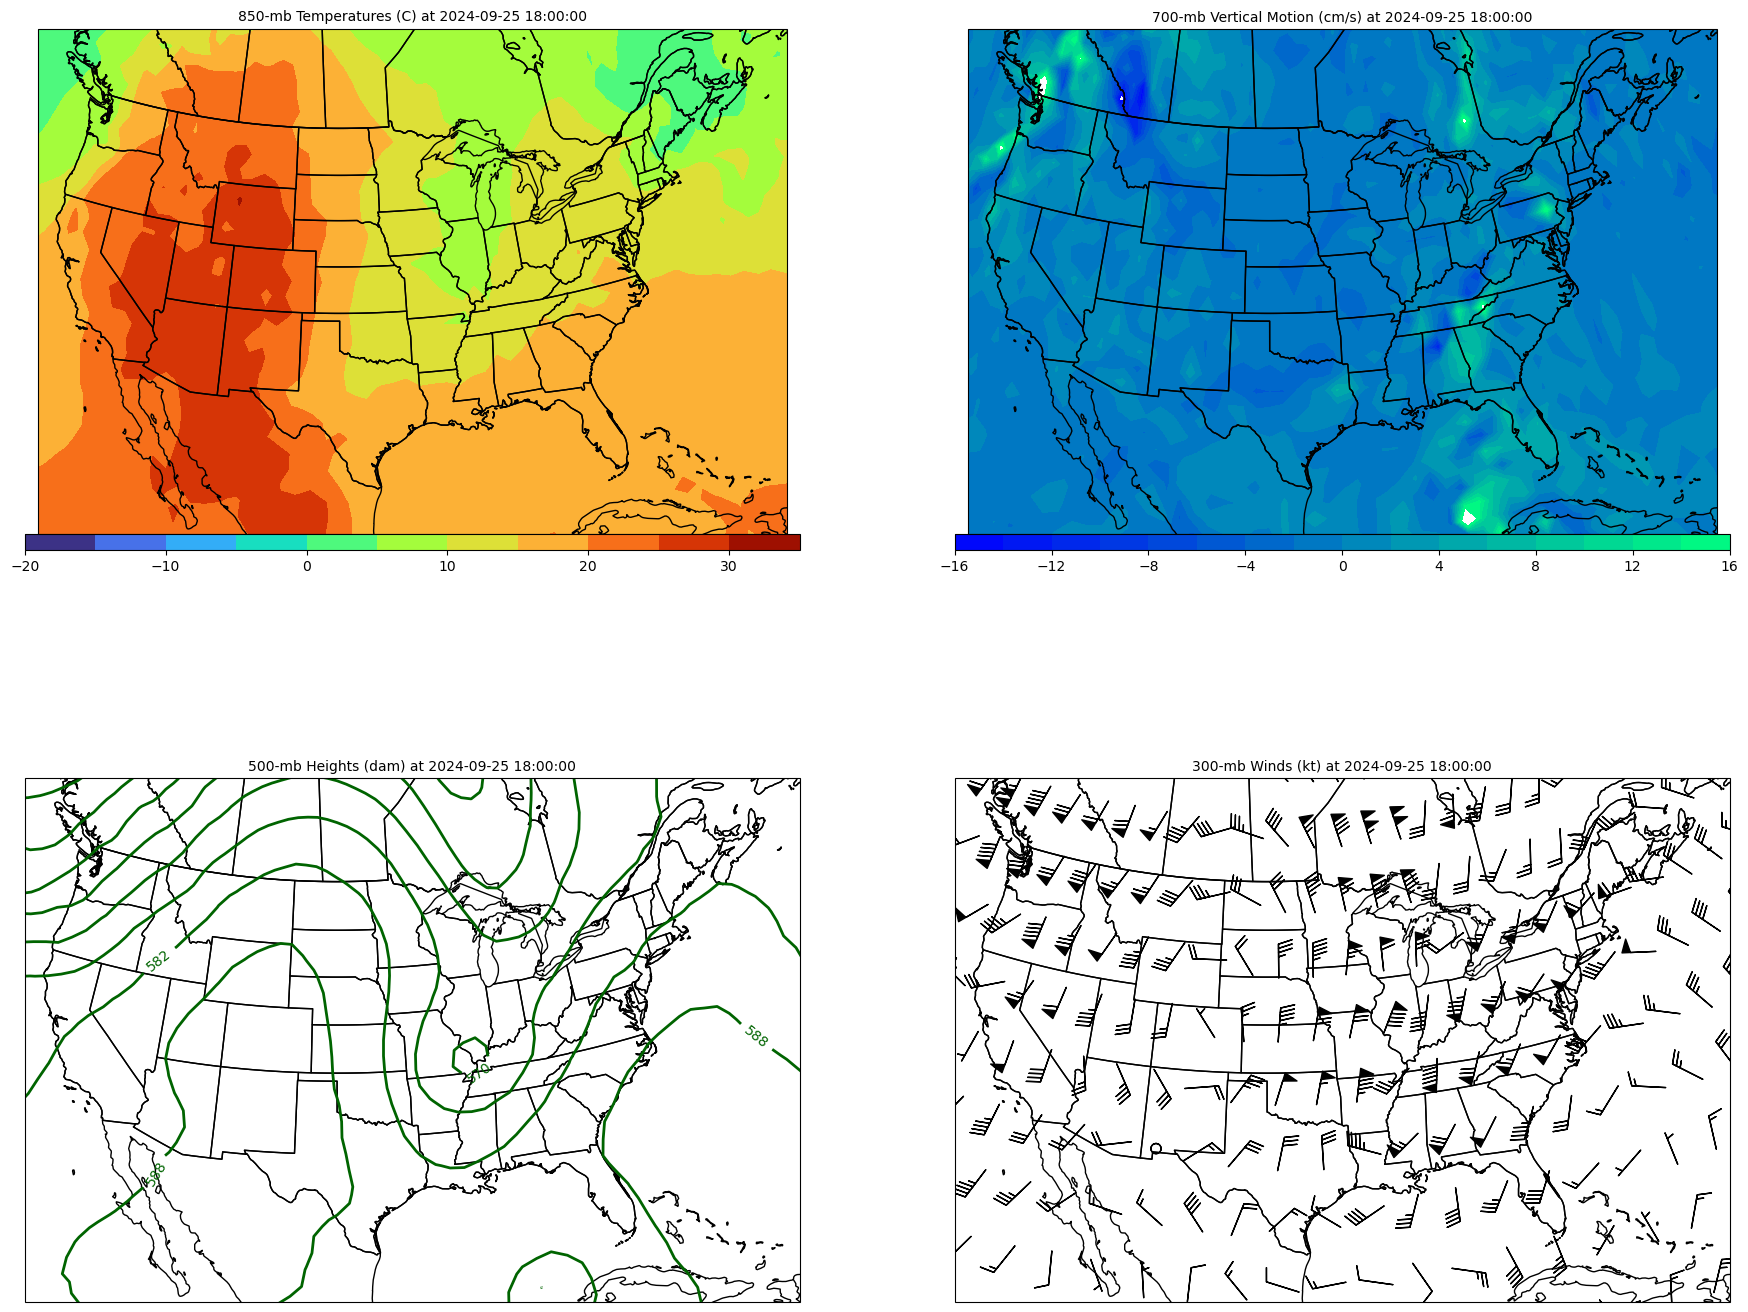

In [8]:
pc = PanelContainer()
pc.size = (22,17)
pc.panels = [panel1, panel2, panel3, panel4]
pc.show()

In [9]:
smoothing = 8
t850 = mpcalc.smooth_gaussian(t850, smoothing)
w700 = mpcalc.smooth_gaussian(w700, smoothing)
ht500 = mpcalc.smooth_gaussian(ht500, smoothing)
u300 = mpcalc.smooth_gaussian(u300, smoothing).rename('u')
v300 = mpcalc.smooth_gaussian(v300, smoothing).rename('v')

wind = xr.merge([u300, v300])

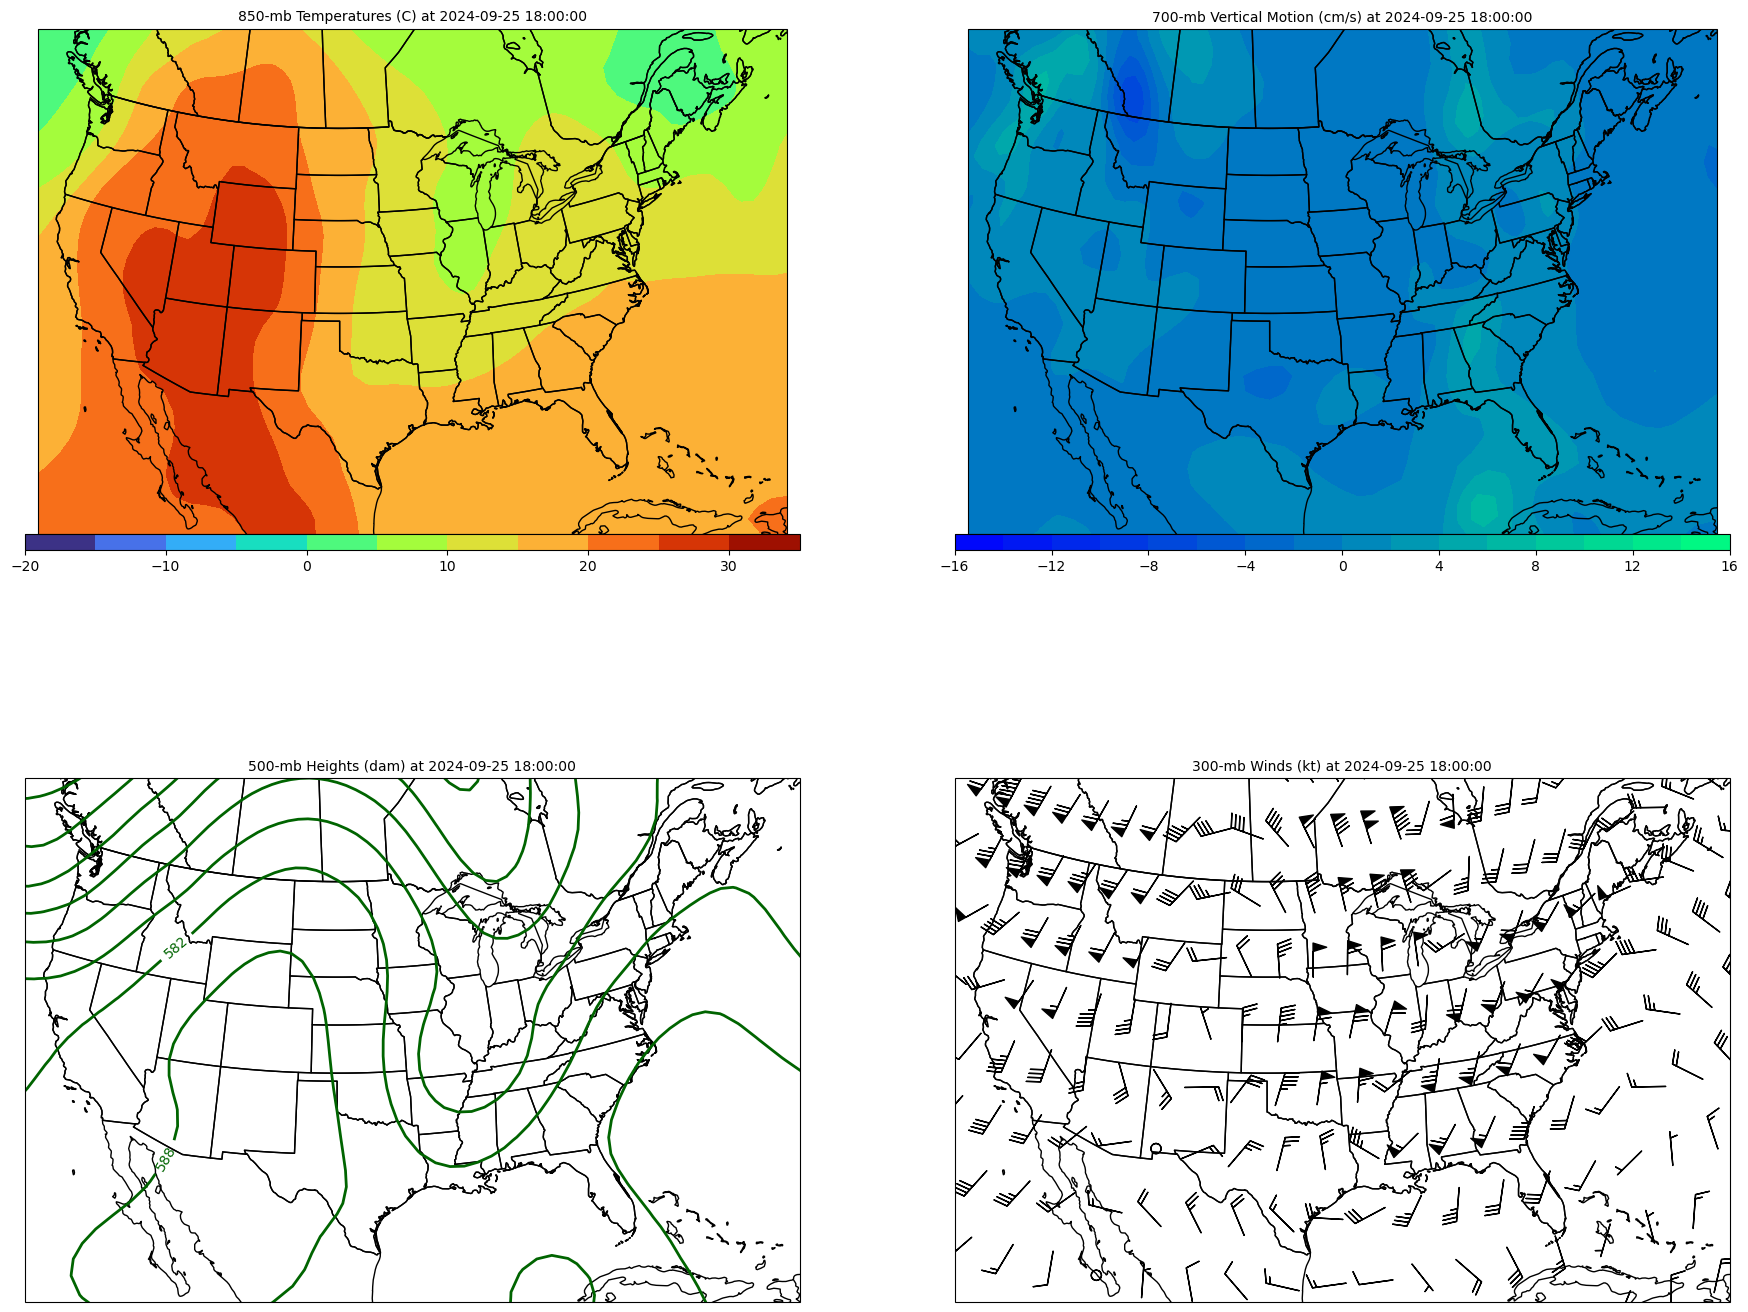

In [10]:
isotherms = FilledContourPlot()
isotherms.data = t850
isotherms.time = plot_time
isotherms.contours = range(-20,40,5)
isotherms.colorbar = 'horizontal'
isotherms.colormap = 'turbo'
isotherms.plot_units = 'degC'

panel1 = MapPanel()
panel1.layout = (2, 2, 1)
panel1.area = [-120, -70, 23, 52]
panel1.projection = 'lcc'
panel1.layers = ['states', 'coastline', 'borders']
panel1.title = f'850-mb Temperatures (C) at {plot_time}'
panel1.plots = [isotherms]

w = FilledContourPlot()
w.data = w700
w.time = plot_time
w.contours = list(range(-16,18,2))
w.colorbar = 'horizontal'
w.colormap = 'winter'
w.plot_units = 'cm/s'

panel2 = panel1.copy()
panel2.layout = (2, 2, 2)
panel2.title = f'700-mb Vertical Motion (cm/s) at {plot_time}'
panel2.plots = [w]

isohypses = ContourPlot()
isohypses.data = ht500
isohypses.time = plot_time
isohypses.contours = list(range(0,600,6))
isohypses.linecolor = 'darkgreen'
isohypses.linestyle = 'solid'
isohypses.clabels = True
isohypses.plot_units = 'dam'

panel3 = panel1.copy()
panel3.layout = (2, 2, 3)
panel3.title = f'500-mb Heights (dam) at {plot_time}'
panel3.plots = [isohypses]

wind = xr.merge([u300, v300])

barbs = BarbPlot()
barbs.data = wind
barbs.time = plot_time
barbs.field = ['u', 'v']
barbs.skip = (4, 3)
barbs.plot_units = 'knot'

panel4 = panel1.copy()
panel4.layout = (2, 2, 4)
panel4.title = f'300-mb Winds (kt) at {plot_time}'
panel4.plots = [barbs]

pc = PanelContainer()
pc.size = (22,17)
pc.panels = [panel1, panel2, panel3, panel4]
pc.show()